In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color: lightgrey; padding: 10px; text-align: center;">
<span style="color: black; font-weight: bold; font-size: 2.2em;">Data_Cleaning</span>
</div>

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
ap=pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\air passanger data set/train.csv")

In [4]:
ap.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
ap.satisfaction.replace({"neutral or dissatisfied":"dissatisfied"},inplace=True)

In [6]:
ap.rename(columns={"Unnamed: 0":"Unnamed0","Customer Type":"Customer_Type","Type of Travel":"Type_of_Travel","Flight Distance":"Flight_Distance","Inflight wifi service":"Inflight_wifi_service","Departure/Arrival time convenient":"Arrival_time_convenient","Ease of Online booking":"Ease_of_Online_booking","Gate location":"Gate_location",
                  "Food and drink":"Food_and_drink","Online boarding":"Online_boarding","Seat comfort":"Seat_comfort","Inflight entertainment":"Inflight_entertainment",
                  "On-board service":"On-board_service","Leg room service":"Leg_room_service","Baggage handling":"Baggage_handling",
                  "Checkin service":"Checkin_service","Inflight service":"Inflight_service","Departure Delay in Minutes":"Departure_Delay_in_Minutes",
                  "Arrival Delay in Minutes":"Arrival_Delay_in_Minutes"},inplace=True)

In [7]:
ap.drop(['Unnamed0','id'],axis=1,inplace=True)

In [8]:
len(ap)

103904

In [9]:
ap.satisfaction.unique()

array(['dissatisfied', 'satisfied'], dtype=object)

In [10]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer_Type               103904 non-null  object 
 2   Age                         103904 non-null  int64  
 3   Type_of_Travel              103904 non-null  object 
 4   Class                       103904 non-null  object 
 5   Flight_Distance             103904 non-null  int64  
 6   Inflight_wifi_service       103904 non-null  int64  
 7   Arrival_time_convenient     103904 non-null  int64  
 8   Ease_of_Online_booking      103904 non-null  int64  
 9   Gate_location               103904 non-null  int64  
 10  Food_and_drink              103904 non-null  int64  
 11  Online_boarding             103904 non-null  int64  
 12  Seat_comfort                103904 non-null  int64  
 13  Inflight_enter

In [11]:
ap.isnull().sum()[ap.isnull().sum()>0]

Arrival_Delay_in_Minutes    310
dtype: int64

In [12]:
ap.Arrival_Delay_in_Minutes.value_counts()

0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: Arrival_Delay_in_Minutes, Length: 455, dtype: int64

In [13]:
ap.Arrival_Delay_in_Minutes.fillna(ap.Arrival_Delay_in_Minutes.mean(),inplace=True)

In [14]:
[ap.select_dtypes(include='object').columns]

[Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'satisfaction'], dtype='object')]

In [15]:
ap.satisfaction.unique()

array(['dissatisfied', 'satisfied'], dtype=object)

In [16]:
ap.Gender.replace({'Male':0, 'Female':1},inplace=True)
ap.Customer_Type.replace({'Loyal Customer':1, 'disloyal Customer':0},inplace=True)
ap.Type_of_Travel.replace({'Personal Travel':1, 'Business travel':2},inplace=True)
ap.Class.replace({'Eco Plus': 1,'Business': 2,'Eco': 3},inplace=True)
ap.satisfaction.replace({'dissatisfied':0, 'satisfied':1},inplace=True)

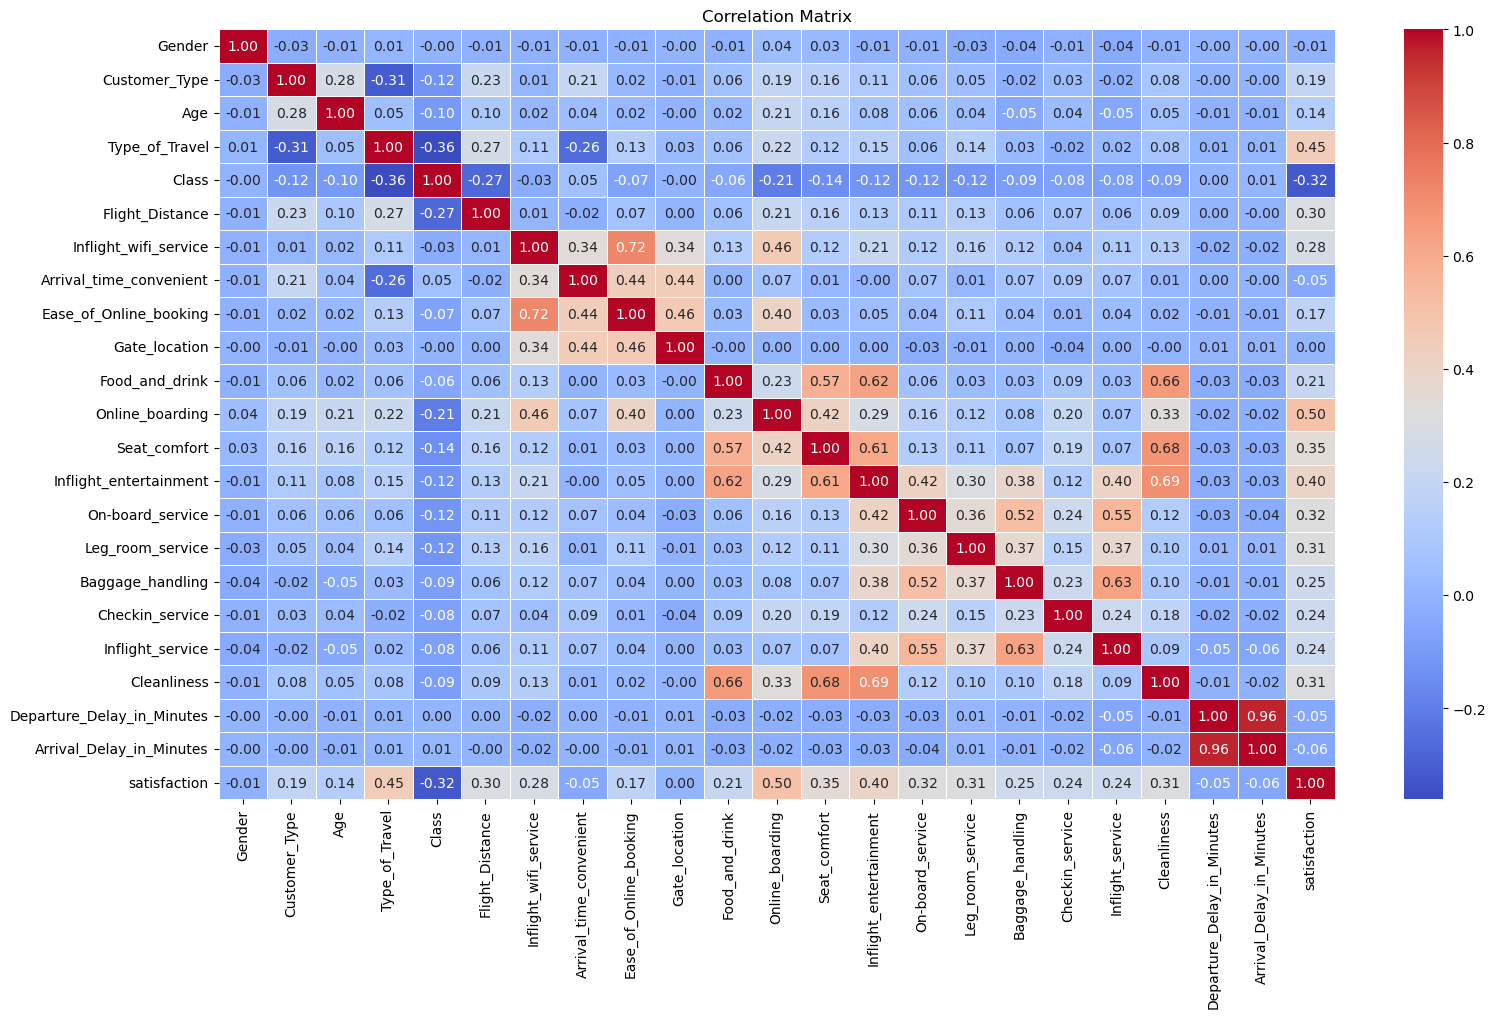

In [17]:
# Calculate correlation matrix
correlation_matrix = ap.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<div style="background-color: lightgrey; padding: 10px; text-align: center;">
<span style="color: black; font-weight: bold; font-size: 2.2em;">Data_Sampling</span>
</div>

In [18]:
from sklearn.model_selection import train_test_split
ap_train,ap_test=train_test_split(ap,test_size=0.2)

In [19]:
ap.shape

(103904, 23)

In [20]:
ap_train_x=ap_train.iloc[::,0:-1]
ap_train_y=ap_train.satisfaction

ap_test_x=ap_test.iloc[::,0:-1]
ap_test_y=ap_test.satisfaction

In [21]:
ap_train_x.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
99947,0,1,10,1,3,370,4,1,4,4,4,4,4,4,4,2,3,4,4,4,3,0.0
16671,0,1,65,1,3,255,1,3,1,3,4,1,4,4,2,3,4,1,3,4,0,9.0
49428,0,1,62,2,2,3934,2,2,4,2,4,3,1,5,5,4,5,5,5,4,58,47.0
35122,0,1,49,1,1,491,3,1,4,3,1,4,1,1,2,5,2,1,3,1,0,0.0
25263,0,1,50,2,2,2345,1,1,1,1,5,4,5,4,4,4,5,3,4,3,1,0.0


<div style="background-color: lightgrey; padding: 10px; text-align: center;">
<span style="color: black; font-weight: bold; font-size: 2.2em;">Logistic_Model</span>
</div>

In [22]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [23]:
logreg.fit(ap_train_x,ap_train_y)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
logreg.score(ap_test_x,ap_test_y)

0.8176218661277128

In [25]:
pred_test = logreg.predict(ap_test_x)

In [26]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Logistic Regression')

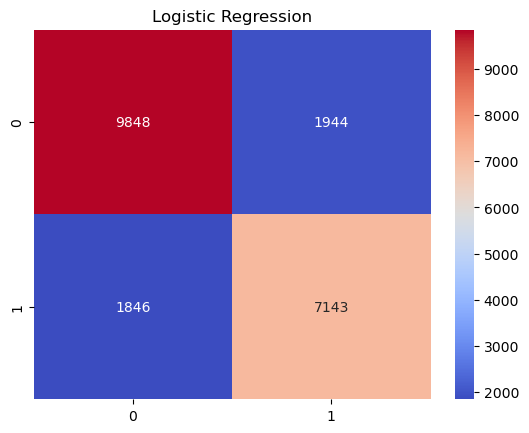

In [27]:
sns.heatmap(confusion_matrix(ap_test_y,pred_test), annot=True, fmt='d', cmap='coolwarm').set_title('Logistic Regression')

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [29]:
accuracy_score(ap_test_y,pred_test)

0.8176218661277128

In [30]:
recall_score(ap_test_y,pred_test)  # TPR

0.7946378907553677

In [31]:
precision_score(ap_test_y,pred_test)

0.7860680092439749

In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve

In [33]:
pred_prob_test=logreg.predict_proba(ap_test_x)
len(pred_prob_test)

20781

In [34]:
roc_auc_score(ap_test_y,pred_prob_test[:,1])

0.8760578189715668

In [35]:
fpr, tpr,thre=roc_curve(ap_test_y,pred_prob_test[:,1])

In [36]:
import matplotlib.pyplot as plt

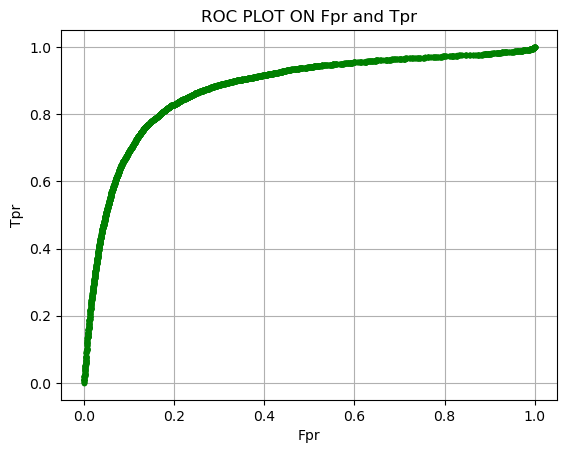

In [37]:
plt.plot(fpr,tpr, marker ='.', color='green')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('ROC PLOT ON Fpr and Tpr')
plt.grid()

<div style="background-color: lightgrey; padding: 10px; text-align: center;">
<span style="color: black; font-weight: bold; font-size: 2.2em;">Decision_Tree</span>
</div>

In [38]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()

In [39]:
dec.fit(ap_train_x,ap_train_y)

DecisionTreeClassifier()

In [40]:
pred_test=dec.predict(ap_test_x)

Text(0.5, 1.0, 'Decision Tree\xa0Classifier')

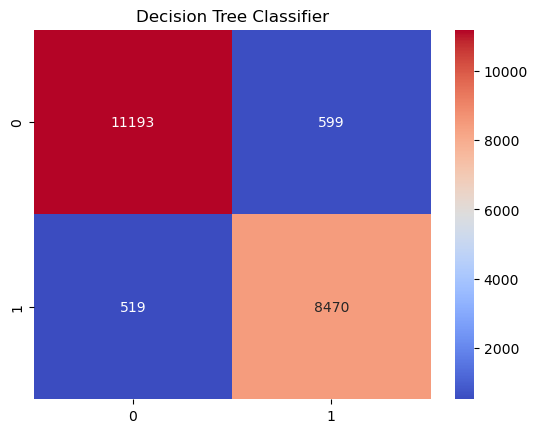

In [41]:
sns.heatmap(confusion_matrix(ap_test_y,pred_test), annot=True, fmt='d', cmap='coolwarm').set_title('Decision Tree Classifier')

In [42]:
accuracy_score(ap_test_y,pred_test)

0.9462008565516578

In [43]:
recall_score(ap_test_y,pred_test)

0.942262765602403

In [44]:
precision_score(ap_test_y,pred_test)

0.9339508214797663

<div style="background-color: lightgrey; padding: 10px; text-align: center;">
<span style="color: black; font-weight: bold; font-size: 2.2em;">Decision_Tree_entropy</span>
</div>

In [45]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(criterion = 'entropy')
# randomeness focus the randomness and take those patterns

In [46]:
dec.fit(ap_train_x,ap_train_y)

DecisionTreeClassifier(criterion='entropy')

In [47]:
pred_test=dec.predict(ap_test_x)

Text(0.5, 1.0, 'Decision Tree\xa0Classifier (entropy)')

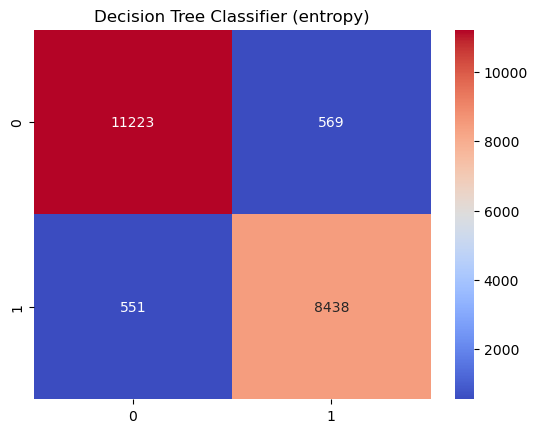

In [48]:
sns.heatmap(confusion_matrix(ap_test_y,pred_test), annot=True, fmt='d', cmap='coolwarm').set_title('Decision Tree Classifier (entropy)')

In [49]:
accuracy_score(ap_test_y,pred_test)

0.9461046147923584

In [50]:
recall_score(ap_test_y,pred_test)

0.93870285904995

In [51]:
precision_score(ap_test_y,pred_test)

0.9368269124014655

<div style="background-color: lightgrey; padding: 10px; text-align: center;">
<span style="color: black; font-weight: bold; font-size: 2.2em;">Decision_with_hyperparameter</span>
</div>

In [52]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(min_samples_split= 80)
# controll the roots

In [53]:
dec.fit(ap_train_x,ap_train_y)

DecisionTreeClassifier(min_samples_split=80)

In [54]:
pred_test =dec.predict(ap_test_x)

Text(0.5, 1.0, 'Decision Tree\xa0Classifier(min_sample_splite)')

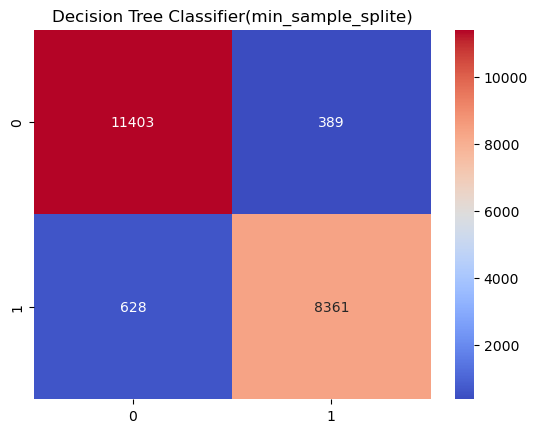

In [55]:
sns.heatmap(confusion_matrix(ap_test_y,pred_test), annot=True, fmt='d', cmap='coolwarm').set_title('Decision Tree Classifier(min_sample_splite)')

In [56]:
accuracy_score(ap_test_y,pred_test)

0.9510610653962754

<div style="background-color: lightgrey; padding: 10px; text-align: center;">
<span style="color: black; font-weight: bold; font-size: 2.2em;">Decision With hyperparametre tunning</span>
</div>

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#  parameter grid
search_dict = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [4, 8, 12, 16, 20], 
    'min_samples_split': [50, 60, 70, 80, 90, 100]
}
dtc = DecisionTreeClassifier()

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(dtc, param_grid=search_dict)
grid_search.fit(ap_train_x, ap_train_y)

# for best parameters
best_params = grid_search.best_params_
print("Best parameters:",best_params)

In [58]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(criterion= 'entropy', max_depth= 20, min_samples_split=100)

In [59]:
dec.fit(ap_train_x,ap_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=100)

In [60]:
pred_train=dec.predict(ap_train_x)
pred_test=dec.predict(ap_test_x)

Text(0.5, 1.0, 'Decision Tree\xa0Classifier(hyperparametre tunnung)')

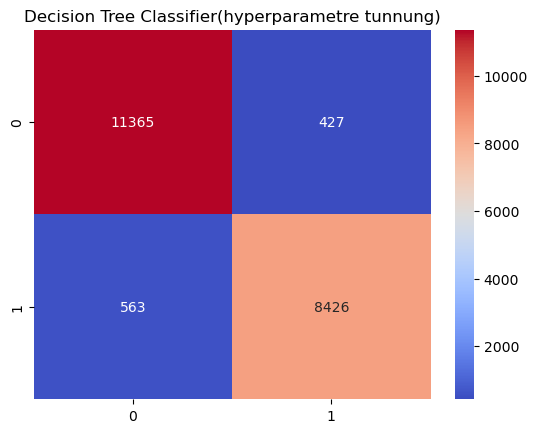

In [61]:

sns.heatmap(confusion_matrix(ap_test_y,pred_test), annot=True, fmt='d', cmap='coolwarm').set_title('Decision Tree Classifier(hyperparametre tunnung)')

In [62]:
accuracy_score(ap_test_y,pred_test)

0.9523603291468168

<div style="background-color: lightgrey; padding: 10px; text-align: center;">
<span style="color: black; font-weight: bold; font-size: 2.2em;">Randome_Forest_Model</span>
</div>

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier()

In [64]:
rfc.fit(ap_train_x,ap_train_y)

RandomForestClassifier()

In [65]:
pred_rfc_ap =rfc.predict(ap_test_x)

Text(0.5, 1.0, 'Randome Forest\xa0Classifier')

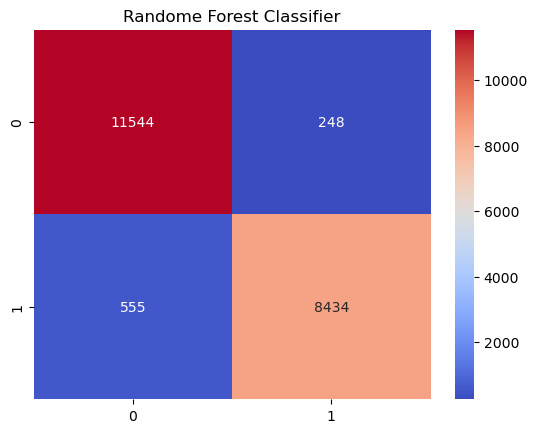

In [66]:
sns.heatmap(confusion_matrix(ap_test_y,pred_rfc_ap), annot=True, fmt='d', cmap='coolwarm').set_title('Randome Forest Classifier')

In [67]:
accuracy_score(ap_test_y,pred_rfc_ap)

0.961358933641307

<div style="background-color: lightgrey; padding: 10px; text-align: center;">
<span style="color: black; font-weight: bold; font-size: 2.2em;">Randome Forest with hyper parameter tunning</span>
</div>

In [68]:
from sklearn.model_selection import GridSearchCV

search_dict = {
    'n_estimators': [50, 100, 150], 
    'criterion': ['gini', 'entropy'], 
    'max_depth': [4, 8, 12, 16, 20], 
    'min_samples_split': [50, 60, 70, 80, 90, 100]
}

rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, param_grid=search_dict)
grid_search.fit(ap_train_x, ap_train_y)
grid_search.best_params_

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(criterion = 'gini',
 max_depth = 20,
 min_samples_split= 50,
 n_estimators= 150)

In [70]:
rfc.fit(ap_train_x,ap_train_y)

RandomForestClassifier(max_depth=20, min_samples_split=50, n_estimators=150)

In [71]:
pred_rfc_ap =rfc.predict(ap_test_x)

Text(0.5, 1.0, 'Randome Forest\xa0Classifier(hyperparameter tunning)')

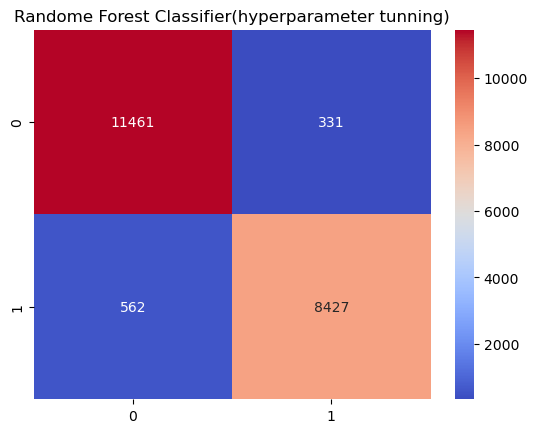

In [72]:
sns.heatmap(confusion_matrix(ap_test_y,pred_rfc_ap), annot=True, fmt='d', cmap='coolwarm').set_title('Randome Forest Classifier(hyperparameter tunning)')

In [73]:
accuracy_score(ap_test_y,pred_rfc_ap)

0.9570280544728358

<div style="background-color: lightgrey; padding: 10px; text-align: center;">
<span style="color: black; font-weight: bold; font-size: 2.2em;">KNN_Model</span>
</div>

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [75]:
knn.fit(ap_train_x,ap_train_y)

KNeighborsClassifier()

In [76]:
pred_knn = knn.predict(ap_test_x)

Text(0.5, 1.0, 'KNN')

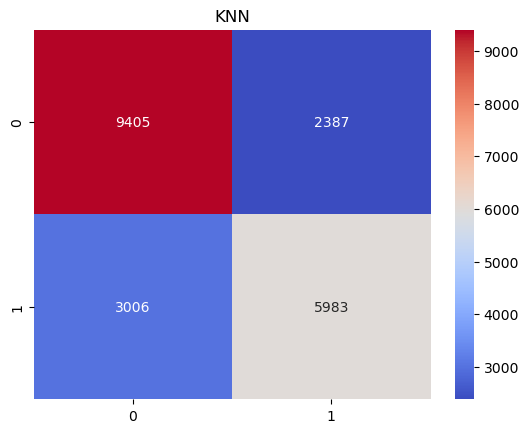

In [77]:
sns.heatmap(confusion_matrix(ap_test_y,pred_knn), annot=True, fmt='d', cmap='coolwarm').set_title('KNN')

In [78]:
accuracy_score(ap_test_y,pred_knn)

0.7404840960492758

<div style="background-color: lightgrey; padding: 10px; text-align: center;">
<span style="color: black; font-weight: bold; font-size: 2.2em;">Removing_Outliers</span>
</div>

In [93]:
ap=pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\air passanger data set/train.csv")

ap.head()

ap.satisfaction.replace({"neutral or dissatisfied":"dissatisfied"},inplace=True)

ap.rename(columns={"Unnamed: 0":"Unnamed0","Customer Type":"Customer_Type","Type of Travel":"Type_of_Travel","Flight Distance":"Flight_Distance","Inflight wifi service":"Inflight_wifi_service","Departure/Arrival time convenient":"Arrival_time_convenient","Ease of Online booking":"Ease_of_Online_booking","Gate location":"Gate_location",
                  "Food and drink":"Food_and_drink","Online boarding":"Online_boarding","Seat comfort":"Seat_comfort","Inflight entertainment":"Inflight_entertainment",
                  "On-board service":"On-board_service","Leg room service":"Leg_room_service","Baggage handling":"Baggage_handling",
                  "Checkin service":"Checkin_service","Inflight service":"Inflight_service","Departure Delay in Minutes":"Departure_Delay_in_Minutes",
                  "Arrival Delay in Minutes":"Arrival_Delay_in_Minutes"},inplace=True)

ap.drop(['Unnamed0','id'],axis=1,inplace=True)

len(ap)

ap.satisfaction.unique()

ap.info()

ap.isnull().sum()[ap.isnull().sum()>0]

ap.Arrival_Delay_in_Minutes.value_counts()

ap.Arrival_Delay_in_Minutes.fillna(ap.Arrival_Delay_in_Minutes.mean(),inplace=True)

[ap.select_dtypes(include='object').columns]

ap.satisfaction.unique()

ap.Gender.replace({'Male':0, 'Female':1},inplace=True)
ap.Customer_Type.replace({'Loyal Customer':1, 'disloyal Customer':0},inplace=True)
ap.Type_of_Travel.replace({'Personal Travel':1, 'Business travel':2},inplace=True)
ap.Class.replace({'Eco Plus': 1,'Business': 2,'Eco': 3},inplace=True)
ap.satisfaction.replace({'dissatisfied':0, 'satisfied':1},inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer_Type               103904 non-null  object 
 2   Age                         103904 non-null  int64  
 3   Type_of_Travel              103904 non-null  object 
 4   Class                       103904 non-null  object 
 5   Flight_Distance             103904 non-null  int64  
 6   Inflight_wifi_service       103904 non-null  int64  
 7   Arrival_time_convenient     103904 non-null  int64  
 8   Ease_of_Online_booking      103904 non-null  int64  
 9   Gate_location               103904 non-null  int64  
 10  Food_and_drink              103904 non-null  int64  
 11  Online_boarding             103904 non-null  int64  
 12  Seat_comfort                103904 non-null  int64  
 13  Inflight_enter

In [80]:
def remove_outliers(df,col,k):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    print("Number of Outliers removed -->", df.shape[0] - df1.shape[0])

In [81]:
remove_outliers(ap, 'satisfaction', 2)

(103904, 23)
Number of Outliers removed --> 0


<div style="background-color: lightgrey; padding: 10px; text-align: center;">
<span style="color: black; font-weight: bold; font-size: 2.2em;">Ada_Boosting_on_Randome_forest</span>
</div>

In [85]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(rfc, n_estimators=10)

ada.fit(ap_train_x,ap_train_y)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=20,
                                                    min_samples_split=50,
                                                    n_estimators=150),
                   n_estimators=10)

In [86]:
pred_ada = ada.predict(ap_test_x)

Text(0.5, 1.0, 'KNN')

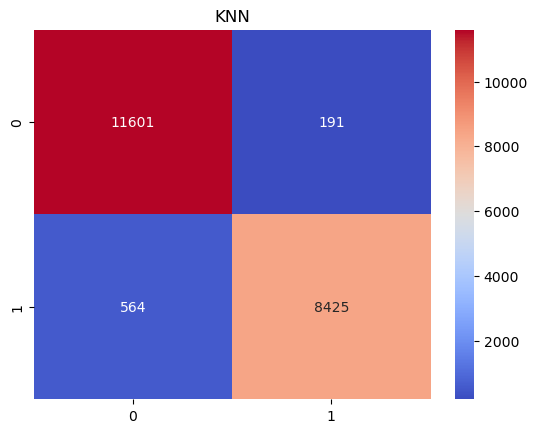

In [87]:
sns.heatmap(confusion_matrix(ap_test_y,pred_ada), annot=True, fmt='d', cmap='coolwarm').set_title('KNN')

In [88]:
accuracy_score(ap_test_y,pred_ada)

0.9636687358644916

<div style="background-color: lightgrey; padding: 10px; text-align: center;">
<span style="color: black; font-weight: bold; font-size: 2.2em;">Ada_Boosting_on_Decision_Tree</span>
</div>

In [89]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(dec, n_estimators=10)

ada.fit(ap_train_x,ap_train_y)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=20,
                                                    min_samples_split=100),
                   n_estimators=10)

In [90]:
pred_ada = ada.predict(ap_test_x)

Text(0.5, 1.0, 'KNN')

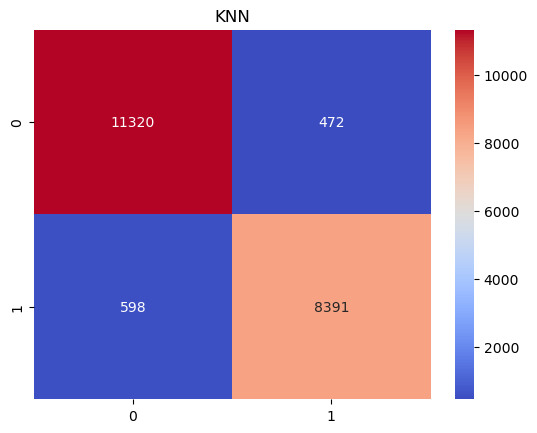

In [91]:
sns.heatmap(confusion_matrix(ap_test_y,pred_ada), annot=True, fmt='d', cmap='coolwarm').set_title('KNN')

In [92]:
accuracy_score(ap_test_y,pred_ada)

0.9485106587748424